In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import Counter
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


In [2]:
dir = 'C:/Users/Rodrigo/dados/'
stemmer = SnowballStemmer("english")

In [3]:
consolidated = pd.read_csv(dir+'consolidated.txt',delimiter=';',names=['id','approved','group','stem','number'])
consolidated_text = pd.read_csv(dir+'consolidated_text.txt',delimiter=';',names=['id','approved','group','stem'])

In [4]:
consolidated.tail()

,id,approved,group,stem,number
24046600,p190772,1,Literacy_Language,it,1
24046601,p190772,1,Literacy_Language,hope,1
24046602,p190772,1,Literacy_Language,also,1
24046603,p190772,1,Literacy_Language,lifetim,1
24046604,p190772,1,Literacy_Language,learner,1


In [5]:
consolidated_text.tail()

,id,approved,group,stem
182075,p014188,1,Math_Science,i current teach math in a lowincom school wher...
182076,p116452,1,Music_The_Arts,my student are predomin hispan and often have ...
182077,p074761,0,Math_Science,i teach scienc to eighth grader at a suburban ...
182078,p136737,1,Literacy_Language,i work with a group of wonder second grade stu...
182079,p190772,1,Literacy_Language,balanc literaci was a mysteri to me until a co...


In [5]:
consolidated_text.groupby('group')['approved'].mean().sort_values(ascending = False)

group
Warmth_Care_Hunger    0.921953
Literacy_Language     0.866507
Music_The_Arts        0.849101
History_Civics        0.848809
Health_Sports         0.847752
Math_Science          0.826273
Applied_Learning      0.822497
Special_Needs         0.810150
Name: approved, dtype: float64

In [6]:
consolidated_text['approved'].mean()

0.8476823374340949

In [7]:
consolidated_text.groupby('group')['approved'].count().sort_values(ascending = False)

group
Literacy_Language     75824
Math_Science          42043
Health_Sports         21754
Applied_Learning      16811
Music_The_Arts         8847
Special_Needs          7685
History_Civics         6925
Warmth_Care_Hunger     2191
Name: approved, dtype: int64

In [8]:
consolidated.groupby(['group','stem'])['approved'].count().sort_values(ascending = False)

group               stem              
Literacy_Language   to                    75822
                    and                   75780
                    the                   75602
                    student               75444
                    a                     75176
                    of                    74931
                    in                    74837
                    are                   73254
                    my                    71309
                    they                  69487
                    their                 69395
                    have                  68845
                    for                   68674
                    is                    67378
                    will                  67179
                    with                  66996
                    that                  65726
                    learn                 65647
                    be                    65200
                    school                64232
 

In [9]:
consolidated_aprov=consolidated[(consolidated.approved==1)]

In [10]:
consolidated_reprov=consolidated[(consolidated.approved==0)]

In [11]:
dd=consolidated_reprov.groupby(['group','stem'])['approved'].count().sort_values(ascending = False)

In [12]:
dd

group              stem               
Literacy_Language  to                     10122
                   and                    10114
                   the                    10075
                   student                10048
                   a                      10006
                   of                      9977
                   in                      9973
                   are                     9737
                   my                      9489
                   they                    9228
                   their                   9222
                   have                    9109
                   for                     9023
                   is                      8948
                   with                    8872
                   will                    8803
                   learn                   8792
                   that                    8775
                   be                      8592
                   i                       8463
 

In [106]:
stopwords.add('school')
stopwords.add('student')
stopwords.add('classroom')
stopwords.add('teacher')
stopwords.add('class')
stopwords.add('teach')

In [ ]:
consolidated_text_apro = consolidated_text[(consolidated_text.approved==1) & (consolidated_text.group=='Math_Science')]

In [99]:
consolidated_text_repro = consolidated_text[(consolidated_text.approved==0) & (consolidated_text.group=='Math_Science')]

In [100]:
tudo =   ' '.join(consolidated_text_repro.stem)

In [75]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200000,
        max_font_size=40, 
        scale=3,
        random_state=None # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

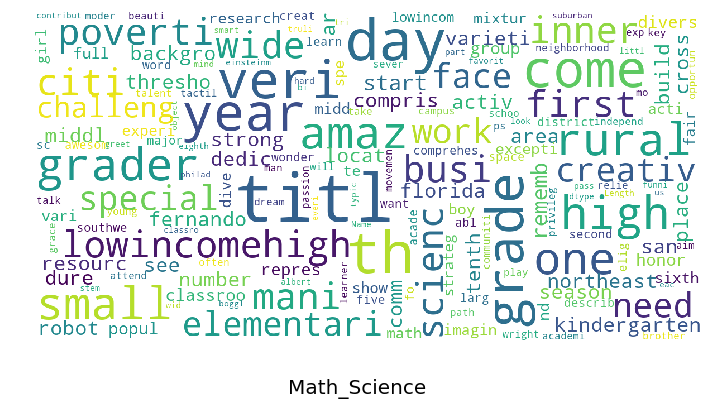

In [107]:
show_wordcloud(consolidated_text_repro['stem'],'Math_Science')

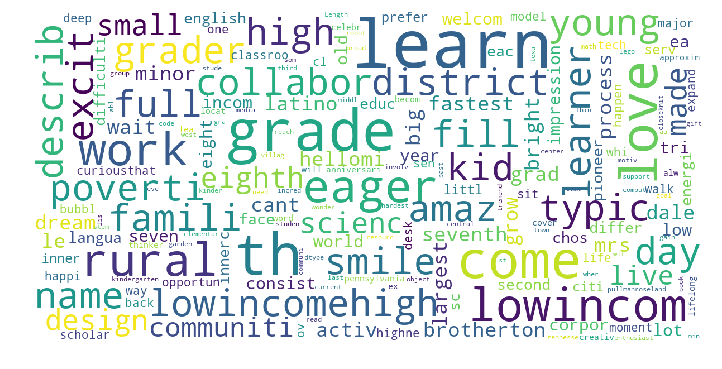

In [108]:
show_wordcloud(consolidated_text_apro ['stem'])

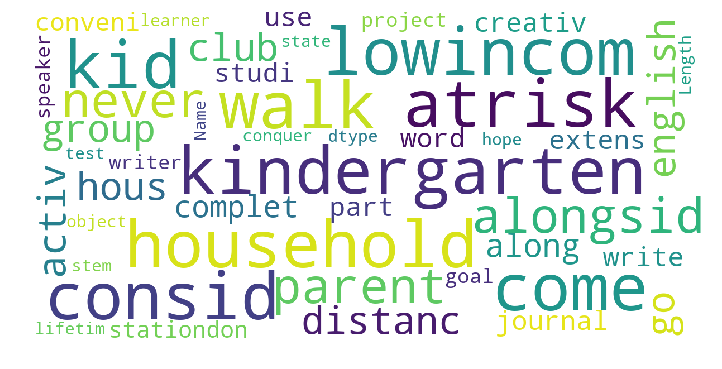

In [109]:
show_wordcloud(consolidated['stem'])

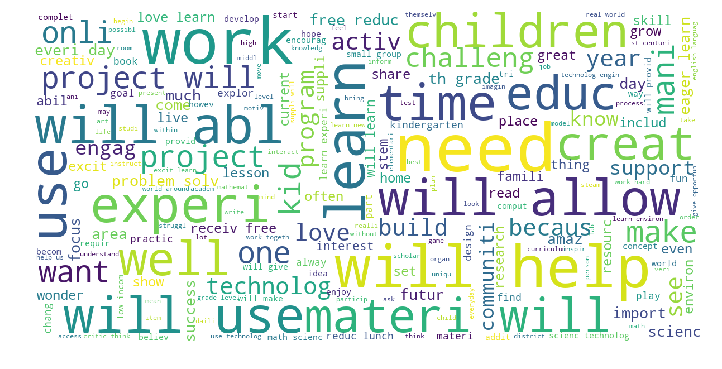

In [110]:
show_wordcloud(tudo)

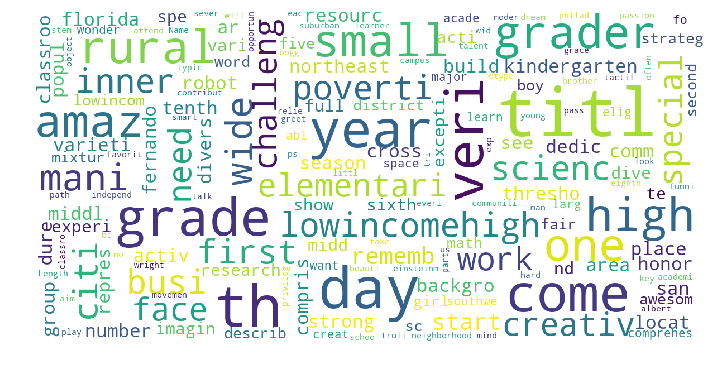

In [111]:
show_wordcloud(consolidated_text_repro['stem'])